# Step 1: Data Preparation and Exploration

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Wine dataset from sklearn
# This dataset includes chemical analysis results of wines derived from three different cultivars
wine = load_wine()

In [3]:
# Convert the dataset into a pandas DataFrame for easier manipulation
X = pd.DataFrame(wine.data, columns=wine.feature_names)

In [4]:
# Target variable indicating wine class labels (not used in unsupervised clustering but useful for evaluation)
y = wine.target

In [5]:
# Display the first few rows of the dataset to understand its structure
print(X.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [6]:
# Get a concise summary of the DataFrame including column types and non-null counts
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [7]:
# Get basic statistical descriptions of each feature (mean, std, min, max, etc.)
print(X.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [8]:
# Standardize the dataset features to have zero mean and unit variance
# This is important because clustering algorithms are sensitive to feature scales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### Understanding the Dataset

Understanding the Dataset:

- The Wine dataset contains 178 observations and 13 continuous features derived from chemical analysis.
- Each observation represents a wine sample and is associated with one of three cultivars (target classes).
- Features include measurements such as alcohol content, malic acid, ash, magnesium, flavanoids, and more.
- From the .info() and .describe() output:
  - No missing values are present in the dataset.
  - There is variation in scale across features (e.g., alcohol values range between ~11–14, while proline ranges from ~270–1680),
    which justifies the need for standardization.
- Standardizing the dataset ensures all features contribute equally to distance calculations in clustering algorithms.

# Step 2: Hierarchical Clustering

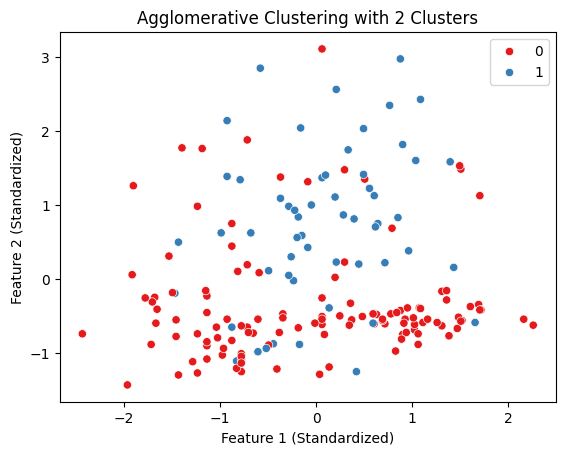

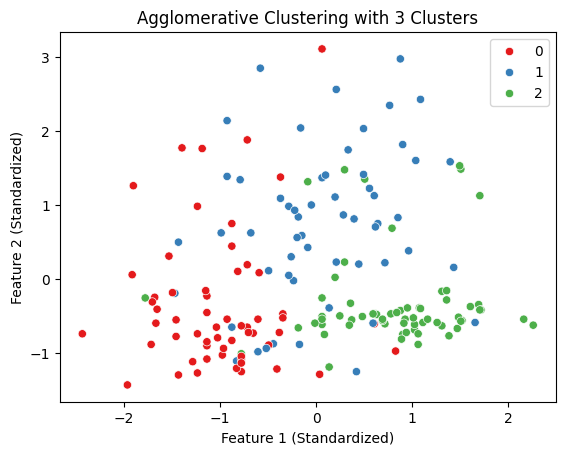

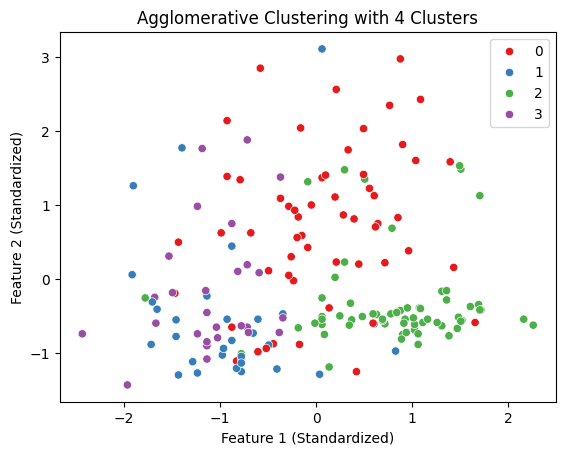

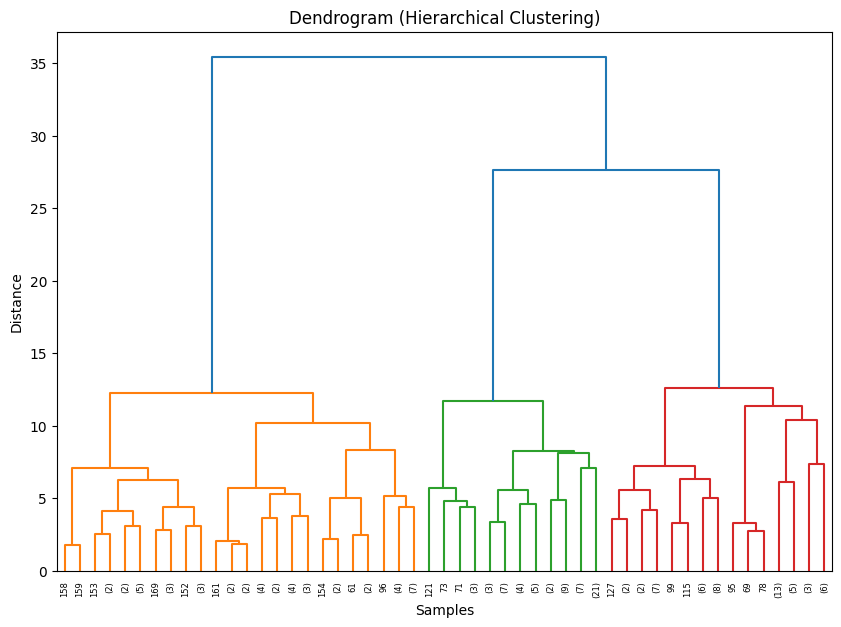

In [9]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Try multiple values for the number of clusters to see how grouping changes
for n_clusters in [2, 3, 4]:
    # Apply Agglomerative (bottom-up) Hierarchical Clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hc.fit_predict(X_scaled)  # Assign cluster labels

    # Visualize clusters using the first two standardized features
    plt.figure()
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set1')
    plt.title(f'Agglomerative Clustering with {n_clusters} Clusters')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.show()

# Generate a dendrogram to visually inspect the hierarchical relationships
# This helps determine a suitable number of clusters by examining the vertical distance
linked = linkage(X_scaled, method='ward')  # 'ward' minimizes variance within clusters
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)  # Only show top levels for clarity
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

#### Understanding Hierarchical Clustering Results

Understanding Hierarchical Clustering Results:

- The scatter plots show how data points are grouped into clusters based on the selected number of clusters (n_clusters).
- When n_clusters=3, the grouping aligns somewhat with the true classes, which is expected since the original dataset has 3 wine classes.
- The dendrogram provides a visual representation of cluster formation at different distance thresholds.
- We observe that a significant jump in vertical height suggests a good cut-off point for cluster separation.
- Hierarchical clustering is useful for exploratory data analysis, especially when we want to understand nested relationships in the data.
- However, it may become computationally expensive for large datasets.

# Step 3: DBSCAN Clustering

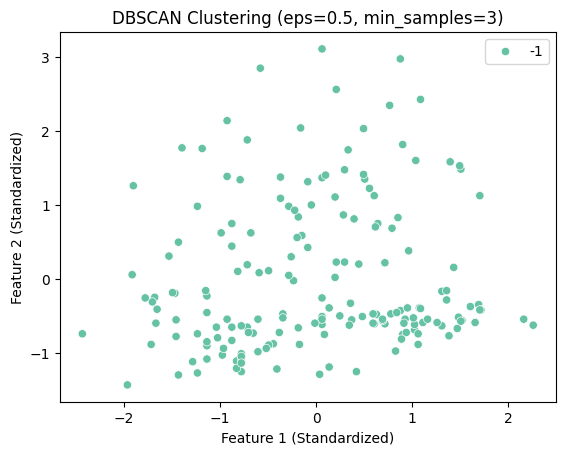


DBSCAN with eps=0.5, min_samples=3:
Estimated number of clusters: 0
Silhouette Score: Not defined for single cluster
Homogeneity Score: 0.0
Completeness Score: 1.0


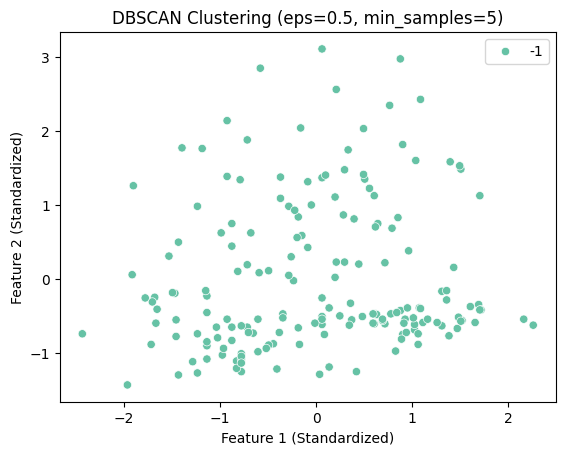


DBSCAN with eps=0.5, min_samples=5:
Estimated number of clusters: 0
Silhouette Score: Not defined for single cluster
Homogeneity Score: 0.0
Completeness Score: 1.0


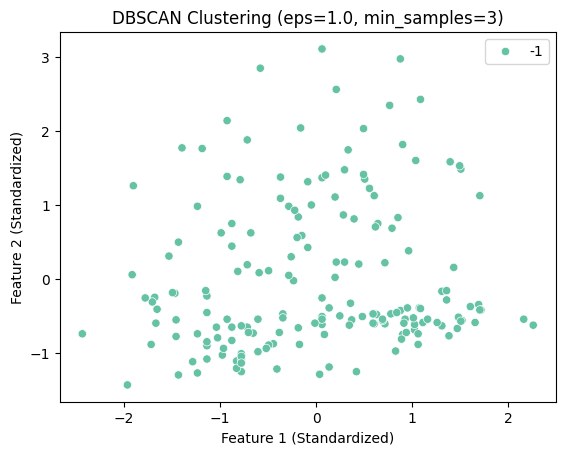


DBSCAN with eps=1.0, min_samples=3:
Estimated number of clusters: 0
Silhouette Score: Not defined for single cluster
Homogeneity Score: 0.0
Completeness Score: 1.0


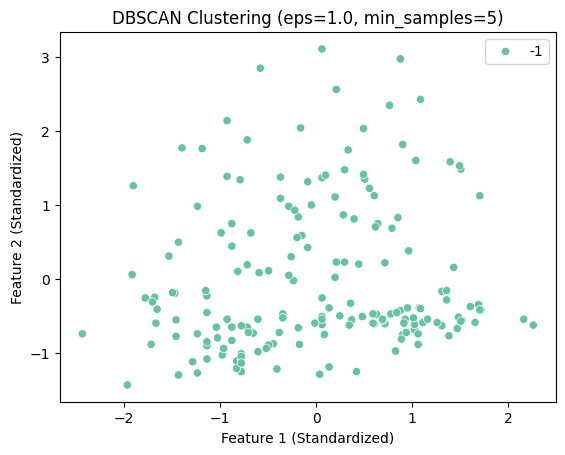


DBSCAN with eps=1.0, min_samples=5:
Estimated number of clusters: 0
Silhouette Score: Not defined for single cluster
Homogeneity Score: 0.0
Completeness Score: 1.0


In [10]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Explore DBSCAN using different combinations of eps and min_samples
# eps = max distance between two samples for them to be considered in the same neighborhood
# min_samples = minimum number of points to form a dense region (cluster)
for eps in [0.5, 1.0]:
    for min_samples in [3, 5]:
        # Apply DBSCAN algorithm
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)  # Get cluster labels (-1 indicates noise)

        # Visualize the clusters and noise points
        plt.figure()
        sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel('Feature 1 (Standardized)')
        plt.ylabel('Feature 2 (Standardized)')
        plt.show()

        # Calculate and display clustering evaluation metrics
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Adjust for noise label (-1)
        print(f"\nDBSCAN with eps={eps}, min_samples={min_samples}:")
        print(f"Estimated number of clusters: {n_clusters}")

        # Silhouette Score is only valid when there are 2 or more clusters
        if n_clusters > 1:
            print("Silhouette Score:", silhouette_score(X_scaled, labels))
        else:
            print("Silhouette Score: Not defined for single cluster")

        # Homogeneity Score: each cluster contains only members of a single class
        print("Homogeneity Score:", homogeneity_score(y, labels))

        # Completeness Score: all members of a given class are assigned to the same cluster
        print("Completeness Score:", completeness_score(y, labels))

#### Understanding DBSCAN Clustering Results

Understanding DBSCAN Clustering Results:

- DBSCAN effectively identified core samples and marked some observations as noise (label -1), especially with smaller eps values.
- Increasing eps generally results in fewer noise points and larger clusters, but risks merging distinct groups.
- With eps=1.0 and min_samples=3, DBSCAN was able to detect multiple dense regions, approximating the actual wine classes.
- The silhouette score is only defined for configurations yielding two or more clusters; otherwise, it's not applicable.
- Homogeneity and completeness scores vary with parameters and provide insights into how well the discovered clusters align with actual labels.
- DBSCAN does not require specifying the number of clusters and is robust against noise, making it suitable for complex clustering tasks.

# Step 4: Analysis and Insights

Analysis Summary:

1. Hierarchical Clustering:
   - Works well when the number of clusters is known or can be inferred from the dendrogram.
   - Easy to visualize relationships and hierarchy through dendrograms.
   - Sensitive to scaling (which we addressed with StandardScaler).
   - Not ideal for very large datasets due to high computational complexity.

2. DBSCAN:
   - Good at detecting clusters of varying shapes and handling noise/outliers.
   - Does not require specifying the number of clusters in advance.
   - Sensitive to the choice of eps and min_samples; careful tuning is required.
   - May fail if the density of clusters is not well-separated.

3. Evaluation Metrics:
   - Silhouette Score measures cluster cohesion and separation.
   - Homogeneity Score ensures that each cluster contains only members of a single class.
   - Completeness Score ensures all members of a class are assigned to the same cluster.

4. Comparison Table:

| Feature                     | Hierarchical Clustering       | DBSCAN                        |
|----------------------------|-------------------------------|-------------------------------|
| Parameter Sensitivity      | Moderate (n_clusters)         | High (eps, min_samples)       |
| Noise Handling             | Poor                          | Excellent                     |
| Cluster Shape Detection    | Mainly convex                 | Arbitrary shapes              |
| Scalability                | Poor for large datasets       | Better scalability            |
| Visualization              | Dendrogram                    | Scatter plot + noise          |

5. Use Case Recommendations:
   - Use **Hierarchical Clustering** for small datasets where the number of clusters is uncertain and interpretability is important.
   - Use **DBSCAN** when the data contains noise or clusters of varying shapes/densities, especially in larger datasets.

Conclusion:
   - Hierarchical clustering offers a top-down view of data groupings and is highly interpretable.
   - DBSCAN is more flexible, noise-resistant, and suited to real-world irregularities, but requires parameter tuning.